In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk_step(y_n, dt, rhs):
    k1 = rhs(y_n)
    k2 = rhs(y_n+dt/2*k1)
    k3 = rhs(y_n+dt/2*k2)
    k4 = rhs(y_n+dt*k3)
    y_np1 = y_n + dt/6 *(k1+2*k2+2*k3+k4)
    return y_np1

In [13]:
N_particles = 3
m = np.array([1.0, 1e-3, 1e-3])
y_initial = np.zeros(N_particles*6)
# x0, y0, z0, vx0, vy0, vz0
# 0   1   2   3    4    5
# x1, y1, z1, vx1, vy1, vz1
# 6   7   8   9    10   11
# x2, y2, z2, vx2, vy2, vz2
# 12  13  14  15   16   17

y_initial[6] = 1.0
y_initial[10] = 1.0

y_initial[12] = 2.0
y_initial[16] = 1./np.sqrt(2)

In [24]:
def rhs(y):
    dydt = np.zeros(N_particles*6)
    for j in range(N_particles):
        for i in range(3):
            dydt[6*j+i] = y[6*j+i+3]
    for j in range(N_particles):
        for i in range(N_particles):
            if i != j:
                dx = y[6*j+0] - y[6*i+0]
                dy = y[6*j+1] - y[6*i+1]
                dz = y[6*j+2] - y[6*i+2]
                d = np.sqrt(dx*dx + dy*dy + dz*dz)
                dydt[6*j+3] -= m[i]/(d*d*d) * dx
                dydt[6*j+4] -= m[i]/(d*d*d) * dy
                dydt[6*j+5] -= m[i]/(d*d*d) * dz
    return dydt

In [48]:
tmax = 110
t = 0
dt = 0.01 #0.5 shows error
Nsteps = int(tmax//dt)
y = y_initial.copy()
ys = []
for i in range(Nsteps):
    y = rk_step(y, dt, rhs)
    t += dt
    ys.append(y)
ys = np.array(ys)    

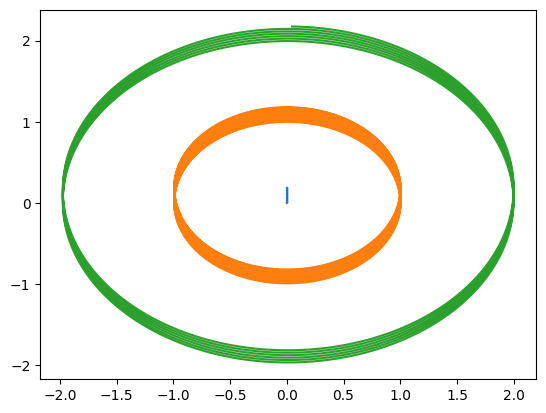

In [49]:
fig, ax = plt.subplots()
ax.plot(ys[:,0], ys[:,1])
ax.plot(ys[:,6], ys[:,7])
ax.plot(ys[:,12], ys[:,13])

In [50]:
tmax = 110
t = 0
dt = 0.5
Nsteps = int(tmax//dt)
y = y_initial.copy()
ys = []
for l in range(Nsteps):
    for j in range(N_particles):
        for k in range(3):
            y[6*j+k] += dt/2. * y[6*j+3+k]
    for j in range(N_particles):
        for i in range(N_particles):
            if i != j:
                dx = y[6*j+0] - y[6*i+0]
                dy = y[6*j+1] - y[6*i+1]
                dz = y[6*j+2] - y[6*i+2]
                d = np.sqrt(dx*dx + dy*dy + dz*dz)
                y[6*j+3] -= dt*m[i]/(d*d*d) * dx
                y[6*j+4] -= dt*m[i]/(d*d*d) * dy
                y[6*j+5] -= dt*m[i]/(d*d*d) * dz            
    for j in range(N_particles):
        for k in range(3):
            y[6*j+k] += dt/2. * y[6*j+3+k]
    
    t += dt
    ys.append(y.copy())
ys = np.array(ys)    

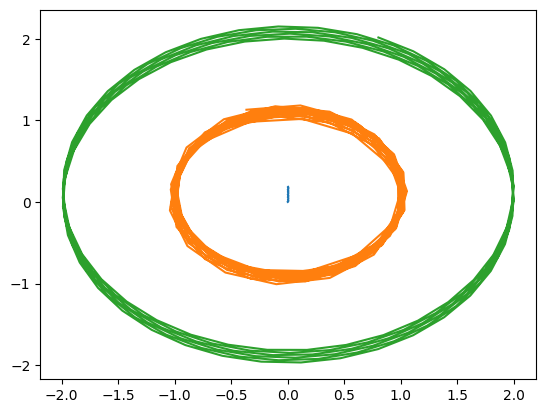

In [51]:
fig, ax = plt.subplots()
ax.plot(ys[:,0], ys[:,1])
ax.plot(ys[:,6], ys[:,7])
ax.plot(ys[:,12], ys[:,13])